# Optional Lab: Linear Regression using Scikit-Learn

There is an open-source, commercially usable machine learning toolkit called [scikit-learn](https://scikit-learn.org/stable/index.html). This toolkit contains implementations of many of the algorithms that you will work with in this course.



## Goals
In this lab you will:
- Utilize  scikit-learn to implement linear regression using Gradient Descent

## Tools
You will utilize functions from scikit-learn as well as matplotlib and NumPy.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
#from lab_utils_multi import  load_house_data
#from lab_utils_common import dlc
np.set_printoptions(precision=2)
#plt.style.use('./deeplearning.mplstyle')

# Gradient Descent
Scikit-learn has a gradient descent regression model [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#examples-using-sklearn-linear-model-sgdregressor).  Like your previous implementation of gradient descent, this model performs best with normalized inputs. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) will perform z-score normalization as in a previous lab. Here it is referred to as 'standard score'.

### Load the data set

In [1]:
# העלאת הקובץ:
# house_prices_dataset.csv
from google.colab import files
uploaded = files.upload()

Saving house_prices_dataset.csv to house_prices_dataset.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['house_prices_dataset.csv']))
df.head(5)

,Size (sqft),Number of Bedrooms,Number of Floors,Age of Home,Price (1000s dollars)
0,2969.660768,3,3,29,609.932154
1,3718.352149,5,3,3,795.670430
2,3212.435192,4,1,74,598.487039
3,2951.974323,4,3,84,556.394865
4,2406.446597,2,2,65,446.289319


In [3]:
columns_names = df.columns
print(columns_names)

Index(['Size (sqft)', 'Number of Bedrooms', 'Number of Floors', 'Age of Home',
       'Price (1000s dollars)'],
      dtype='object')


In [4]:
# Extracting the features and target variable into separate numpy arrays
X_train = df.drop('Price (1000s dollars)', axis=1).values  # Features (all columns except 'Price')
y_train = df['Price (1000s dollars)'].values  # Target variable ('Price')

In [5]:
print ('The shape of x_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))

The shape of x_train is: (200, 4)
The shape of y_train is:  (200,)
Number of training examples (m): 200


### Scale/normalize the training data

StandardScaler: Z-score normalization. The formula used is (X - mean) / std_dev

In [8]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[4.47e+03 4.00e+00 2.00e+00 9.90e+01]
Peak to Peak range by column in Normalized X:[3.5  2.77 2.52 3.29]


### Create and fit the regression model

In [9]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 38, number of weight updates: 7601.0


### View parameters
Note, the parameters are associated with the *normalized* input data. The fit parameters are very close to those found in the previous lab with this data.

In [10]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")
print( "model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16")

model parameters:                   w: [255.23   7.06   7.81 -29.87], b:[540.6]
model parameters from previous lab: w: [110.56 -21.27 -32.71 -37.97], b: 363.16


### Make predictions
Predict the targets of the training data. Use both the `predict` routine and compute using $w$ and $b$.

In [11]:
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(X_norm)
# make a prediction using w,b.
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[609.75 794.85 598.81 556.59]
Target values 
[609.93 795.67 598.49 556.39]


### Plot Results
Let's plot the predictions versus the target values.

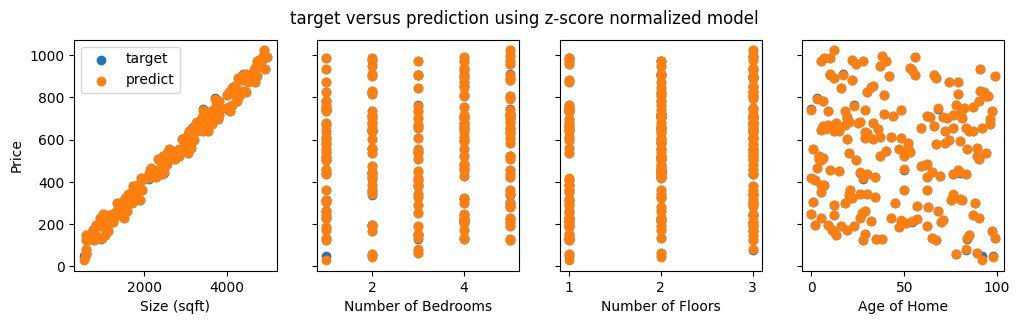

In [12]:
# plot predictions and targets vs original features
fig,ax=plt.subplots(1,4,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(columns_names[i])
    ax[i].scatter(X_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [13]:
#The R-squared (R²) value
print(sgdr.score(X_norm, y_train))

0.9999594202197278


In [30]:
x_house_norm = np.array([-1.21, -0.02, -1.4,  -0.21])
print(x_house_norm.shape)
x_house_norm = x_house_norm.reshape(1,4)
print(x_house_norm.shape)

(4,)
(1, 4)


In [33]:
y_pred_sgd = sgdr.predict(X_norm)

y_pred_sgd_house = sgdr.predict(x_house_norm)
print("predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ", y_pred_sgd_house*1000,"$")


predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old =  [226971.11] $


## Congratulations!
In this lab you:
- utilized an open-source machine learning toolkit, scikit-learn
- implemented linear regression using gradient descent and feature normalization from that toolkit

Credit to: Coursera-Supervised Machine Learning: Regression and Classification

Modified by: Merav Varsano Maala